## Sprawozdanie3

**Data:** 2024-05-26  
**Autor:** Piotr Szepietowski

## Wykorzystywane dalej biblioteki zewnętrzne Pythona

    - Numpy
    - matplotlib

## Zadanie 1
Zadaniem jest zaimplementowanie metody potegowej do wyznaczenia współczynnika uwarunkowania macierzy, powinna być funkcją przyjmującą macierz a zwracającą

    - wyliczony współczynnik
    - współczynnik z wbudowanej fukcji
    - różnicę metod

In [24]:
import numpy as np

def power_method_cond(A, tol=1e-10, max_iter=1000):
    n = A.shape[0]
    b_k = np.random.rand(n)
    for _ in range(max_iter):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        if b_k1_norm == 0:
            break
        b_k_next = b_k1 / b_k1_norm
        if np.linalg.norm(b_k_next - b_k) < tol:
            break
        b_k = b_k_next
    sigma_max = np.linalg.norm(np.dot(A, b_k))
    try:
        A_inv = np.linalg.inv(A)
    except np.linalg.LinAlgError:
        return np.inf, np.nan, np.nan

    c_k = np.random.rand(n)
    for _ in range(max_iter):
        c_k1 = np.dot(A_inv, c_k)
        c_k1_norm = np.linalg.norm(c_k1)
        if c_k1_norm == 0:
            break
        c_k_next = c_k1 / c_k1_norm
        if np.linalg.norm(c_k_next - c_k) < tol:
            break
        c_k = c_k_next
    sigma_min = 1 / np.linalg.norm(np.dot(A, c_k))

    cond_power = sigma_max / sigma_min
    cond_builtin = np.linalg.cond(A)
    diff = abs(cond_power - cond_builtin)
    return cond_power, cond_builtin, diff

A = np.array([[2, 1], [1, 3]])
cond_power, cond_builtin, diff = power_method_cond(A)
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin)
print("Różnica:", diff)

A = np.random.rand(10, 10)
cond_power, cond_builtin, diff = power_method_cond(A)
print("Współczynnik uwarunkowania (metoda potęgowa):", cond_power)
print("Współczynnik uwarunkowania (wbudowana funkcja):", cond_builtin)
print("Różnica:", diff)

Współczynnik uwarunkowania (metoda potęgowa): 4.999999999999999
Współczynnik uwarunkowania (wbudowana funkcja): 2.6180339887498953
Różnica: 2.3819660112501038
Współczynnik uwarunkowania (metoda potęgowa): 1.3445002637281165
Współczynnik uwarunkowania (wbudowana funkcja): 35.41873679693157
Różnica: 34.074236533203454


## Zadanie 2 
Stosując stworzoną funkcję zbadaj wpływ rozmiaru i rodzaju macierzy na efektywność metody i uzyskiwane współczynniki uwarunkowania.

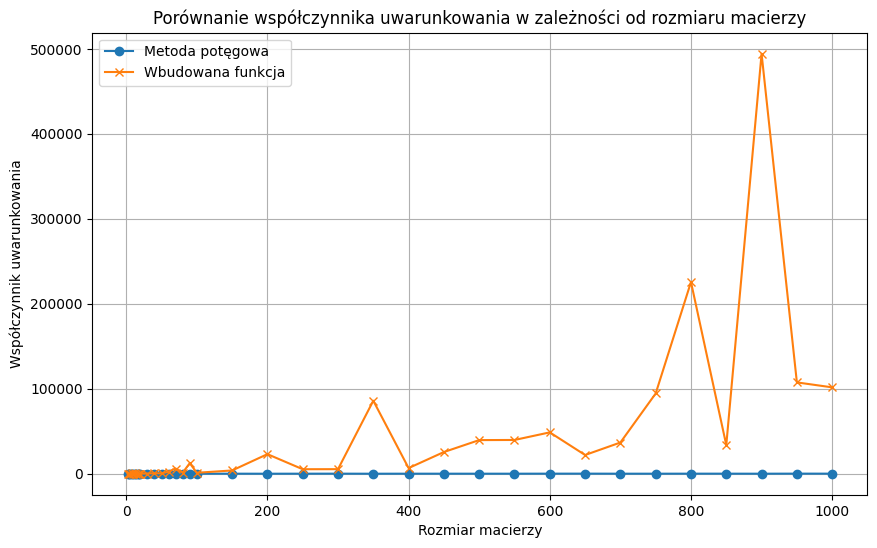

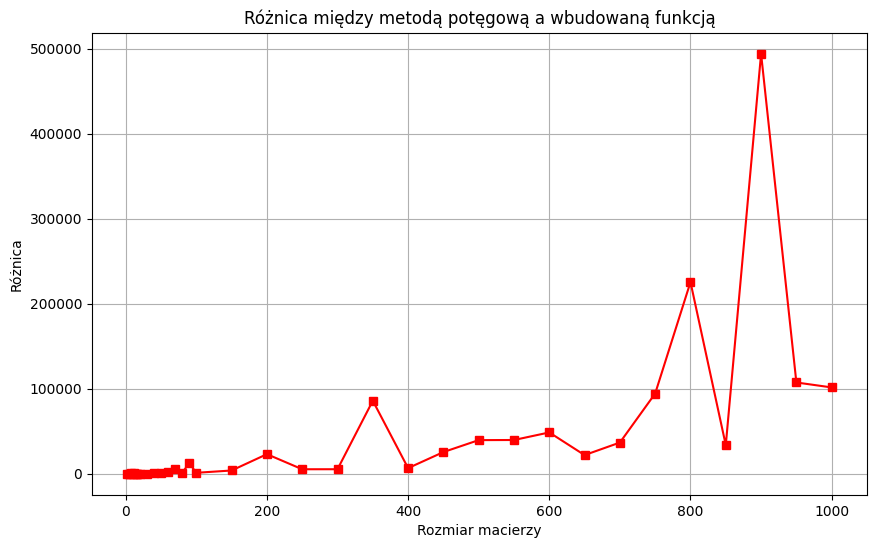

In [30]:
import matplotlib.pyplot as plt

sizes = [x for x in range(2, 21, 2)] + [x for x in range(30, 101, 10)] + [x for x in range(150, 1001, 50)]
cond_powers = []
cond_builtins = []
diffs = []

for n in sizes:
    # Macierz losowa
    A_rand = np.random.rand(n, n)
    cond_power, cond_builtin, diff = power_method_cond(A_rand)
    cond_powers.append(cond_power)
    cond_builtins.append(cond_builtin)
    diffs.append(diff)

plt.figure(figsize=(10, 6))
plt.plot(sizes, cond_powers, marker='o', label='Metoda potęgowa')
plt.plot(sizes, cond_builtins, marker='x', label='Wbudowana funkcja')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Współczynnik uwarunkowania')
plt.title('Porównanie współczynnika uwarunkowania w zależności od rozmiaru macierzy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sizes, diffs, marker='s', color='red')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Różnica')
plt.title('Różnica między metodą potęgową a wbudowaną funkcją')
plt.grid(True)
plt.show()